<a href="https://colab.research.google.com/github/eftekhar-hossain/CUET_NLP-EACL_2021/blob/main/Test_set_evaluation(Hope_speech).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Libraries

In [ ]:
%%time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
result_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/EACL 2021- Shared Tasks/Hope Speech/Evaluation/"
folder_path = "/content/drive/MyDrive/Colab Notebooks/NLP Projects/EACL 2021- Shared Tasks/Hope Speech/"


CPU times: user 411 ms, sys: 200 ms, total: 611 ms
Wall time: 995 ms


#Evaluation Metrices

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred))
    print("Accuracy : ",round(accuracy_score(true,pred),3))
    print("Precison : ",round(precision_score(true,pred, average = 'weighted'),3))
    print("Recall : ",round(recall_score(true,pred,  average = 'weighted'),3))
    print("F1 : ",round(f1_score(true,pred,  average = 'weighted'),3))

In [ ]:
def con_mat(true,pred,class_names,language):
  
  cm = confusion_matrix(true,pred)
  #sns.set()
  plt.figure(figsize =(5, 3))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True,fmt="d",cmap='Greens', ax = ax,annot_kws={"size": 12}) #annot=True to annotate cells
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels') 
  #ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(class_names, rotation=45); ax.yaxis.set_ticklabels(class_names, rotation=45);
  ax.xaxis.tick_top()
  plt.savefig(f"{language}.png",bbox_inches='tight',dpi =600)

# Tamil Result

In [ ]:
### Actual Test labels
actual_labels = pd.read_csv(result_path+'tamil_hope_test.csv',delimiter=';')
actual_labels  = actual_labels.drop(columns='Unnamed: 2')
actual_labels 

In [ ]:
actual_labels['label'].value_counts()

Non_hope_speech    946
Hope_speech        815
not-Tamil          259
Name: label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels = pd.read_excel(result_path +'test_predictions_ta.xlsx')
model_names = predicted_labels.columns.values.tolist()
model_names= model_names[1:]
model_names


['xlm-r',
 'm-bert',
 'indic-bert',
 'cnn-bilstm',
 'cnn-bilstm-fas',
 'LR',
 'SVM',
 'Ensemble']

In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels['label'],predicted_labels[i])
  print('\n')

Model Name: ---->  xlm-r 

[[372 362  81]
 [217 653  76]
 [ 26  28 205]]
                 precision    recall  f1-score   support

    Hope_speech       0.60      0.46      0.52       815
Non_hope_speech       0.63      0.69      0.66       946
      not-Tamil       0.57      0.79      0.66       259

       accuracy                           0.61      2020
      macro avg       0.60      0.65      0.61      2020
   weighted avg       0.61      0.61      0.60      2020

Accuracy :  0.609
Precison :  0.61
Recall :  0.609
F1 :  0.602


Model Name: ---->  m-bert 

[[402 352  61]
 [268 633  45]
 [ 45  56 158]]
                 precision    recall  f1-score   support

    Hope_speech       0.56      0.49      0.53       815
Non_hope_speech       0.61      0.67      0.64       946
      not-Tamil       0.60      0.61      0.60       259

       accuracy                           0.59      2020
      macro avg       0.59      0.59      0.59      2020
   weighted avg       0.59      0.59      

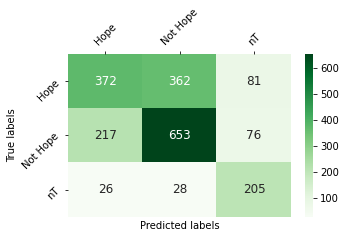

In [ ]:
con_mat(actual_labels['label'],predicted_labels['xlm-r'],class_names=['Hope','Not Hope','nT'],language='tamil')

# Malayalam Result

In [ ]:
### Actual Test labels
actual_labels_mal = pd.read_csv(result_path+'malayalam_hope_test.csv',delimiter=';')
actual_labels_mal  = actual_labels_mal.drop(columns='Unnamed: 2')
actual_labels_mal['label'] = actual_labels_mal['label'].replace({'not-Malayalam':'not-malayalam'}) 
actual_labels_mal

In [ ]:
actual_labels_mal['label'].value_counts()

Non_hope_speech    776
Hope_speech        194
not-malayalam      101
Name: label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels_mal = pd.read_excel(result_path +'test_predictions_mal.xlsx')
model_names = predicted_labels_mal.columns.values.tolist()
model_names= model_names[1:]
model_names


['xlm-r',
 'xlnet',
 'm-bert',
 'indic-bert',
 'cnn-bilstm',
 'cnn-bilstm-fas',
 'LR',
 'SVM',
 'Ensemble']

In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels_mal['label'],predicted_labels_mal[i])
  print('\n')

Model Name: ---->  xlm-r 

[[143  47   4]
 [ 76 688  12]
 [  5  15  81]]
                 precision    recall  f1-score   support

    Hope_speech       0.64      0.74      0.68       194
Non_hope_speech       0.92      0.89      0.90       776
  not-malayalam       0.84      0.80      0.82       101

       accuracy                           0.85      1071
      macro avg       0.80      0.81      0.80      1071
   weighted avg       0.86      0.85      0.85      1071

Accuracy :  0.852
Precison :  0.859
Recall :  0.852
F1 :  0.854


Model Name: ---->  xlnet 

[[ 66 123   5]
 [ 52 718   6]
 [  5  26  70]]
                 precision    recall  f1-score   support

    Hope_speech       0.54      0.34      0.42       194
Non_hope_speech       0.83      0.93      0.87       776
  not-malayalam       0.86      0.69      0.77       101

       accuracy                           0.80      1071
      macro avg       0.74      0.65      0.69      1071
   weighted avg       0.78      0.80      

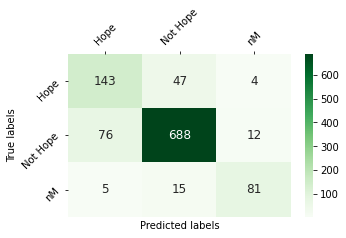

In [ ]:
con_mat(actual_labels_mal['label'],predicted_labels_mal['xlm-r'],class_names=['Hope','Not Hope','nM'],language='mal')

# English Result

In [ ]:
### Actual Test labels
actual_labels_en = pd.read_csv(result_path+'english_hope_test.csv',delimiter=';')
actual_labels_en  = actual_labels_en.drop(columns='Unnamed: 2')
#actual_labels_mal['label'] = actual_labels['label'].replace({'not-Malayalam':'not-malayalam'}) 
actual_labels_en

In [ ]:
actual_labels_en['label'].value_counts()

Non_hope_speech    2593
Hope_speech         250
not-English           3
Name: label, dtype: int64

In [ ]:
### Predicted Labels for all the models
predicted_labels_en = pd.read_excel(result_path +'test_predictions_english.xlsx')
model_names = predicted_labels_en.columns.values.tolist()
model_names= model_names[1:]
model_names


['bert',
 'xlnet',
 'xlm-r',
 'distillbert',
 'roberta',
 'cnn-bilstm',
 'cnn-bi-fas',
 'LR',
 'SVM',
 'Ensemble']

In [ ]:
for i in model_names:
  print("Model Name: ----> ",i,"\n")
  print_metrices(actual_labels_en['label'],predicted_labels_en[i])
  print('\n')

Model Name: ---->  bert 

[[ 157   93    0]
 [ 112 2481    0]
 [   0    3    0]]
                 precision    recall  f1-score   support

    Hope_speech       0.58      0.63      0.61       250
Non_hope_speech       0.96      0.96      0.96      2593
    not-English       0.00      0.00      0.00         3

       accuracy                           0.93      2846
      macro avg       0.52      0.53      0.52      2846
   weighted avg       0.93      0.93      0.93      2846

Accuracy :  0.927
Precison :  0.928
Recall :  0.927
F1 :  0.928


Model Name: ---->  xlnet 

[[ 163   87    0]
 [ 111 2482    0]
 [   0    3    0]]
                 precision    recall  f1-score   support

    Hope_speech       0.59      0.65      0.62       250
Non_hope_speech       0.97      0.96      0.96      2593
    not-English       0.00      0.00      0.00         3

       accuracy                           0.93      2846
      macro avg       0.52      0.54      0.53      2846
   weighted avg       0.9

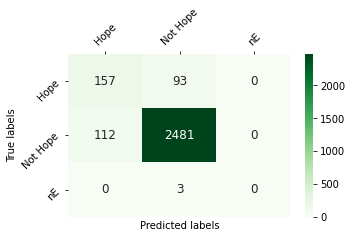

In [ ]:
con_mat(actual_labels_en['label'],predicted_labels_en['xlm-r'],class_names=['Hope','Not Hope','nE'],language='en')

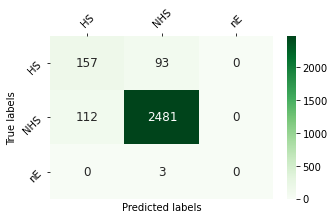

In [ ]:
con_mat(actual_labels_en['label'],predicted_labels_en['xlm-r'],class_names=['HS','NHS','nE'],language='en')

In [ ]:
bert_models = ['xlm-r', 'xlnet','bert','distillbert','roberta']
for i in bert_models:
  print(f"Model-----> {i}")
  con_mat(actual_labels_en['label'],predicted_labels_en[i],class_names=['HS','NHS','nE'],language='en')
  print('\n')